#  <font color=green> <center> <u>  FORMATION INGENIEUR IA  </u> - OpenClassroom </center> </font> 
---
## <font color=blue> <center> Projet 3 - <u> Préparez des données pour un organisme de santé publique </u>  </font>

---
## Importation des modules utiles

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ACP
from sklearn import decomposition

# Imputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.impute import KNNImputer
from sklearn.linear_model import SGDClassifier

# Clustering hierarchique
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn import preprocessing

# K-means
from sklearn.cluster import KMeans

#  ONOVA
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Voilà
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual
from __future__ import print_function

save_figures = False

In [3]:
%matplotlib inline
sns.set()

# I -  Fonction importantes 

In [4]:
#Décommenter la ligne si une erreur sur le package 'import_ipynb' apparait
!pip install import-ipynb     
import import_ipynb
from P3_04_my_functions import *


importing Jupyter notebook from P3_04_my_functions.ipynb


# II - Néttoyage + Analyse descriptive

In [5]:
data_0 = pd.read_csv('openfood.csv', sep="\t",low_memory=False) 

## Traitement des noms de pays

In [6]:
data_0.loc[ data_0['countries']== 'en:FR', 'countries'] = 'France'
data_0.loc[ (data_0['countries']== 'US')|(data_0['countries']== 'en:US'), 'countries'] = 'United States'
data_0.loc[ data_0['countries']== 'Switzerland', 'countries'] = 'Suisse'
data_0.loc[ (data_0['countries']== 'Deutschland')|(data_0['countries']== 'en:DE'), 'countries'] = 'Germany'
data_0.loc[ (data_0['countries']== 'España')|(data_0['countries']== 'en:ES'), 'countries'] = 'Spain'
data_0.loc[ data_0['countries']== 'en:CH', 'countries'] = 'China'
data_0.loc[ (data_0['countries']== 'Belgium')|(data_0['countries']== 'en:BE'), 'countries'] = 'Belgique'
data_0.loc[ data_0['countries']== 'en:GB', 'countries'] = 'United Kingdom'
data_0.loc[ data_0['countries']== 'en:CA', 'countries'] = 'Canada'
data_0.loc[ data_0['countries']== 'en:BR', 'countries'] = 'Brasil'
data_0.loc[ data_0['countries']== 'en:AU', 'countries'] = 'Australia'
data_0.loc[ (data_0['countries']== 'en:IT')|(data_0['countries']== 'Italia')|(data_0['countries']== 'Italy'),'countries'] = 'Italie'

In [7]:
data = data_0.copy()
data.head(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.shape

(320772, 162)

<strong> Répartition des données par pays </strong>

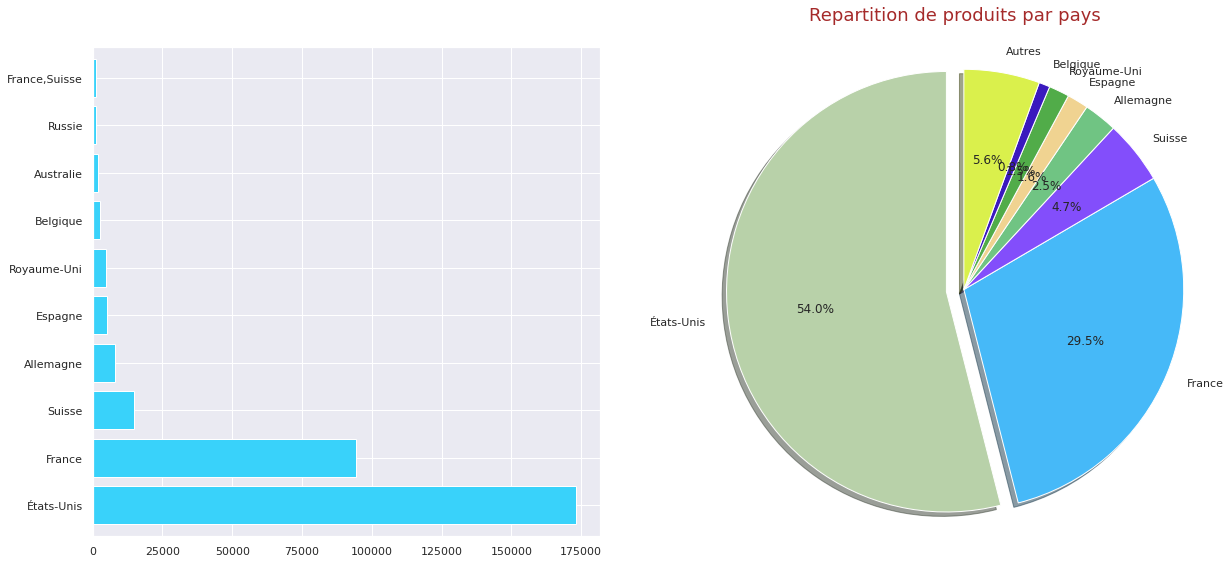

In [9]:
n=10
x = data_0['countries_fr'].value_counts()
cut = 7
plt.figure(figsize=(20,9))
plt.subplot(1,2,1)
x.head(n).plot(kind='barh' , width=0.8,color=couleur_léatoire_hex())
plt.subplot(1,2,2)
if n < cut:
    val , labl = np.append( x.values[:n+1], np.sum(x.values[n+1:]) ) , np.append(x.index[:n+1] , "Autres")
else :
    val , labl = np.append( x.values[:cut], np.sum(x.values[cut:]) ) , np.append(x.index[:cut] , "Autres")
camemberg( sizes=val , labels=labl , titre="Repartition de produits par pays\n")
if save_figures : plt.savefig("a.jpeg")
plt.show()

## Je limite mes données uniquement aux produits présents en France

In [10]:
line_number = widgets.IntSlider(min=1 , max=11, step =2 , value = 3, description ="lignes :")
countries = widgets.Dropdown(options=['France', 'USA',  'Allemagne',"Chine", 'Suisse', 'Angleterre',"Espagne" ] , description ="Pays :")
hb = widgets.HBox( [countries ,line_number ] )

def choix_du_pays (lignes ,pays='France' ) :
    global data
    if pays =='France' :
        data = data_0[data_0['countries']=='France']
    elif pays =='Suisse' :
        data =  data_0[data_0['countries']=='Suisse']
    elif pays =='USA' :
        data =  data_0[data_0['countries']=='United States']
    elif pays =='Allemagne' :
        data =  data_0[data_0['countries']=='Germany']
    elif pays =='Angleterre' :
        data =  data_0[data_0['countries']=='United Kingdom' ]
    elif pays =='Espagne' :
        data =  data_0[data_0['countries']=='Spain' ]
    elif pays =='Chine' :
        data =  data_0[data_0['countries']=='China' ]
    display( widgets.Label(f"{data.shape[0]}  lignes et {data.shape[1]} variables", disabled=False , size=10),data.head(lignes))
    return data

w0 = widgets.interactive_output( choix_du_pays, {"pays" : countries , "lignes" : line_number } )
display( hb , w0)

Label(value='94271  lignes et 162 variables')

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,date-limite-app,1434530704,2015-06-17T08:45:04Z,1434535914,2015-06-17T10:11:54Z,Filet de bœuf,NaN,2.46 kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,0000000027205,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1458238630,2016-03-17T18:17:10Z,1458238638,2016-03-17T18:17:18Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Output()

##  Densité de valeurs manquantes sur toutes les données

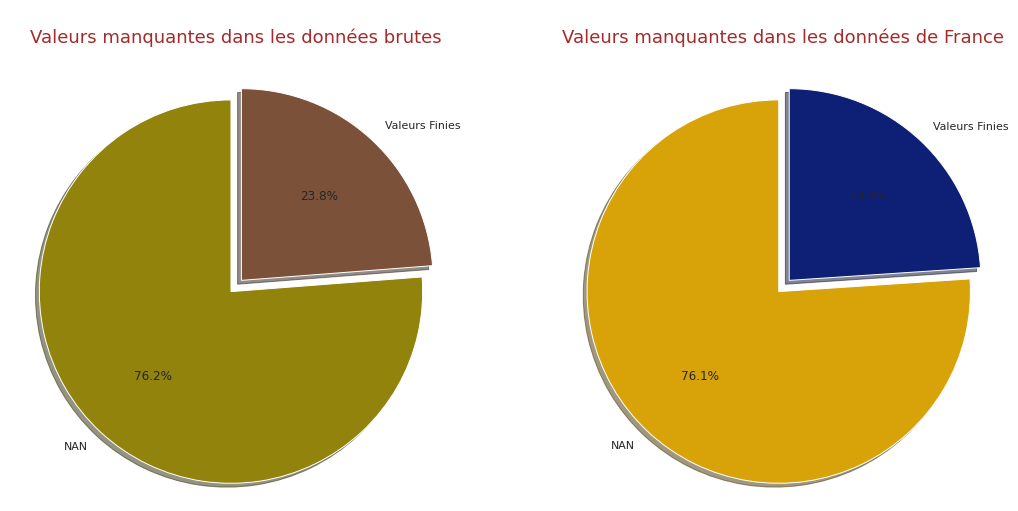

In [11]:
a , a_0 =  data.isna().sum().sum()  ,  data_0.isna().sum().sum()
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
camemberg(sizes = [ a_0 , data_0.size - a_0 ] , labels = ["NAN","Valeurs Finies"] ,titre = "\nValeurs manquantes dans les données brutes\n")
plt.subplot(1,2,2)
camemberg(sizes = [ a , data.size - a ] , labels = ["NAN","Valeurs Finies"] , titre = f"\nValeurs manquantes dans les données de {data['countries'].unique()[0]}\n" )
if save_figures :  plt.savefig("a1.jpeg")
plt.show()

In [12]:
data_0.select_dtypes(include=[object]).shape[1]

56

In [13]:
data_0.select_dtypes(include=[float]).shape[1]

106

In [14]:
data.shape

(94271, 162)

## Suppression de colonnes inutiles

In [15]:
rm_var = [ 'url', 'creator', 'created_t', 'created_datetime','last_modified_t', 'last_modified_datetime', 'product_name', 'quantity',
       'packaging', 'packaging_tags', 'brands', 'brands_tags','ingredients_text', 'states', 'states_tags', 'states_fr',
       'main_category', 'main_category_fr', 'image_url', 'image_small_url','countries_tags', 'countries_fr',]
data = data.drop(rm_var ,axis=1)

## Visualisation de la proportion de valeurs manquantes sur les colonnes

(94271, 140)

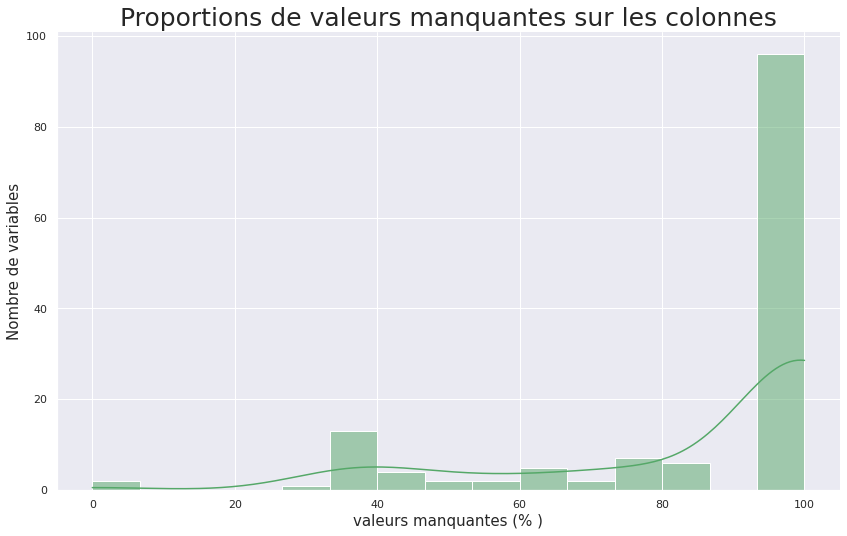

In [16]:
def bar_plot( n_bar  ) :
    global data
    display(data.shape)
    sns.displot( data.isna().mean()*100, kde=True,color='g', bins=n_bar, height=7, aspect=1.7 )
    plt.xlabel('valeurs manquantes (% )', size= 15)
    plt.ylabel("Nombre de variables", size =15)
    plt.title("Proportions de valeurs manquantes sur les colonnes",size=25)
    if save_figures : plt.savefig("a2.jpeg")
    plt.show()
    
widgets.interact( bar_plot , n_bar = widgets.IntSlider(min = 5,max=50,value = 15 , step=1) ) ;

## Suppression des colonnes à forte concentration de valeurs manquantes

In [17]:
data = data.loc[:, data.isna().mean() < 0.5]   

Post visualisation

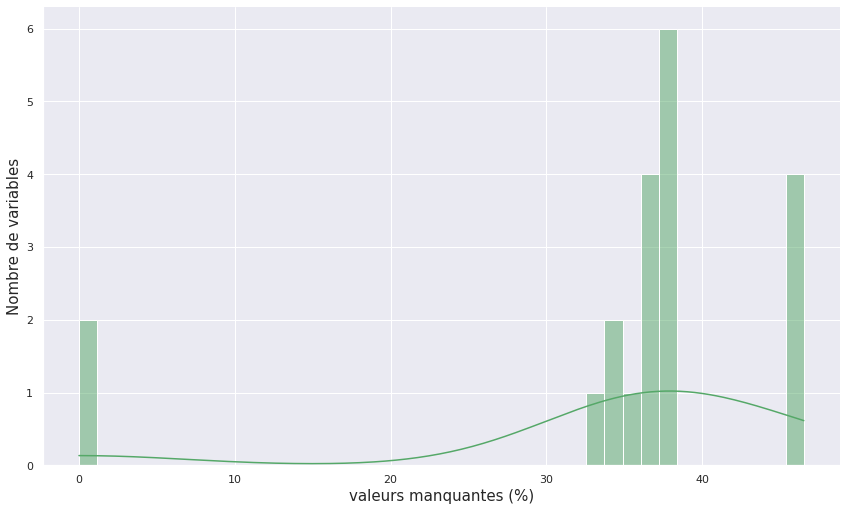

In [18]:
sns.displot( data.isna().mean()*100, kde=True,color='g', bins=40, height=7, aspect=1.7 )
plt.xlabel('valeurs manquantes (%)', size= 15)
plt.ylabel("Nombre de variables", size =15)
plt.show()

## Visualisation de la proportion de valeurs manquantes sur les lignes 

<Figure size 864x144 with 0 Axes>

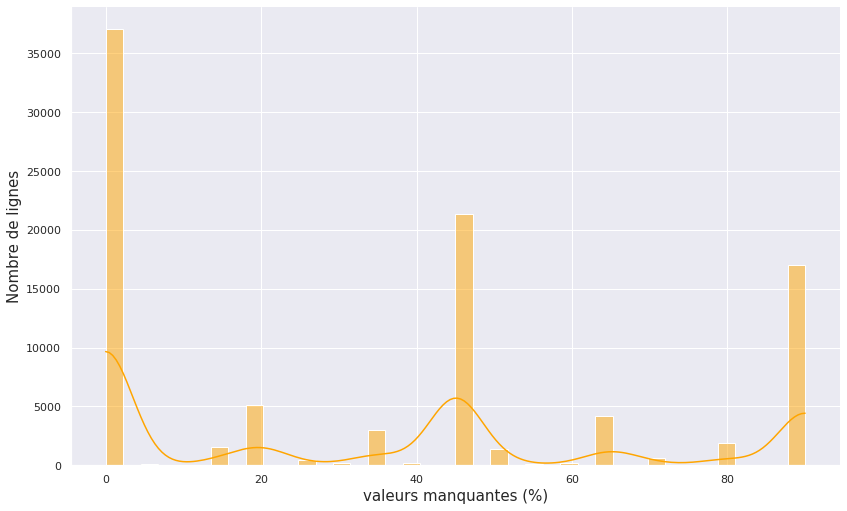

In [19]:
plt.figure(figsize=(12,2))
sns.displot( data.isna().mean(axis=1)*100, kde=True,color='orange', bins=40, height=7, aspect=1.7 )
plt.xlabel('valeurs manquantes (%)', size= 15)
plt.ylabel("Nombre de lignes", size =15)
if save_figures : plt.savefig("a3.jpeg")
plt.show()

## Suppression des colonnes à forte concentration de valeurs manquantes

In [20]:
data = data.loc[data.isna().mean(axis=1) < 0.5, :]

Post visualisation

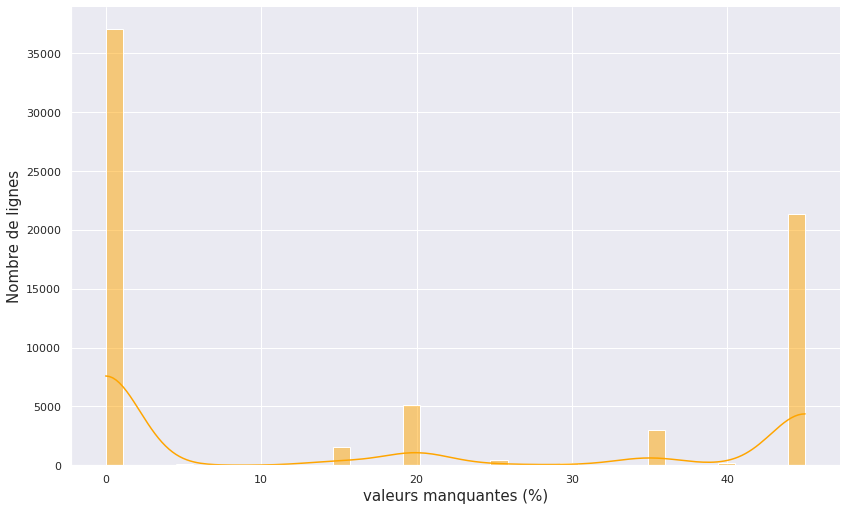

In [21]:
sns.displot( data.isna().mean(axis=1)*100, kde=True,color='orange', bins=40, height=7, aspect=1.7 )
plt.xlabel('valeurs manquantes (%)', size= 15)
plt.ylabel("Nombre de lignes", size =15)
plt.show()

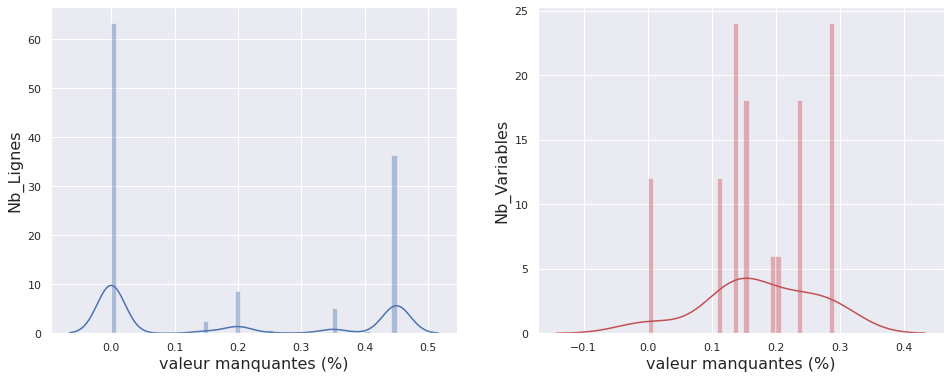

In [22]:
hist_lign_col(data , kde=True)

## Focus uniquement sur les variables à caractères numériques

In [23]:
data = data.loc[ data.select_dtypes(include= [float]).isna().mean(axis=1) < 0.5 , :]    

In [24]:
data.shape

(59643, 20)

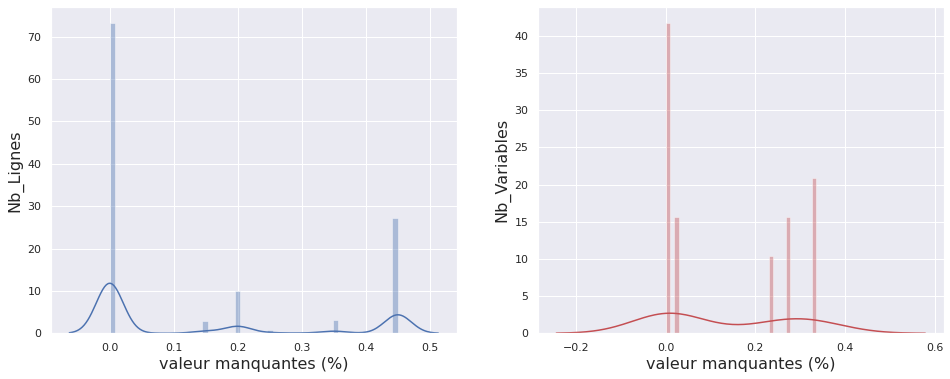

In [25]:
hist_lign_col(data ,kde=True)

In [26]:
data.select_dtypes(include=[object]).shape[1]

9

In [27]:
data.select_dtypes(include=[float]).shape[1]

11

In [28]:
data.shape

(59643, 20)

In [29]:
data.describe()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,39664.000000,39664.000000,39664.000000,5.961300e+04,59226.000000,59245.000000,59525.000000,59309.000000,59309.000000,58371.000000,58371.000000
mean,2.048356,0.078711,0.165062,1.173146e+03,5.386091,13.180896,7.777990,1.156973,0.455500,8.611759,8.301982
std,2.623311,0.273379,0.472162,1.335935e+04,8.543610,18.964135,7.906907,4.238230,1.668534,9.018865,9.354674
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-0.100000,0.000000,0.000000,0.000000,-15.000000,-15.000000
25%,0.000000,0.000000,0.000000,4.280000e+02,0.300000,1.000000,1.800000,0.080000,0.031496,1.000000,0.000000
50%,1.000000,0.000000,0.000000,1.029000e+03,1.900000,4.000000,6.000000,0.570000,0.224409,9.000000,7.000000
75%,3.000000,0.000000,0.000000,1.644000e+03,7.300000,17.000000,11.000000,1.250000,0.492126,15.000000,16.000000
max,31.000000,2.000000,5.000000,3.251373e+06,210.000000,104.000000,100.000000,211.000000,83.000000,40.000000,36.000000


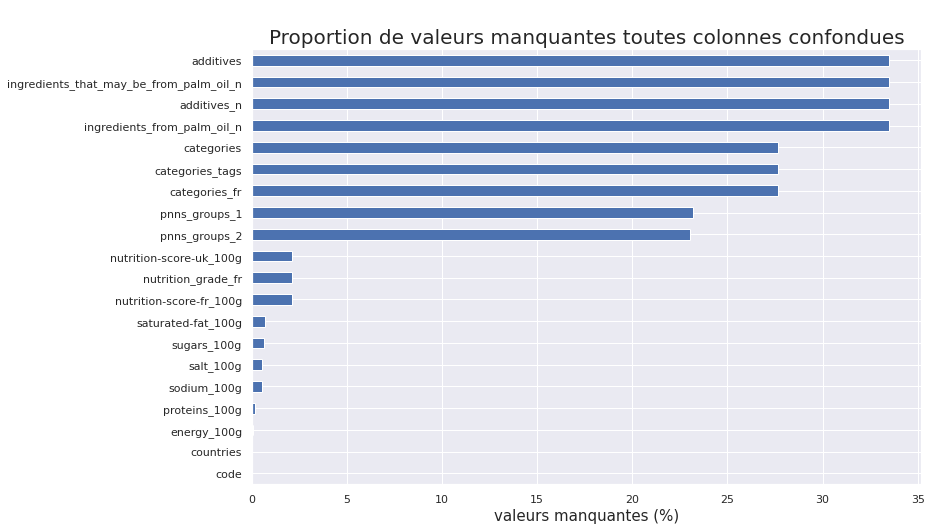

In [30]:
plt.figure(figsize=(12,8))
(data.isna().mean()*100).sort_values().plot.barh()
plt.title("\nProportion de valeurs manquantes toutes colonnes confondues" , size=20)
plt.xlabel('valeurs manquantes (%)',size=15)
if save_figures : plt.savefig("a4.jpeg")
plt.show()

## Exploration des types de chaque variables

In [31]:
data.dtypes

code                                        object
categories                                  object
categories_tags                             object
categories_fr                               object
countries                                   object
additives_n                                float64
additives                                   object
ingredients_from_palm_oil_n                float64
ingredients_that_may_be_from_palm_oil_n    float64
nutrition_grade_fr                          object
pnns_groups_1                               object
pnns_groups_2                               object
energy_100g                                float64
saturated-fat_100g                         float64
sugars_100g                                float64
proteins_100g                              float64
salt_100g                                  float64
sodium_100g                                float64
nutrition-score-fr_100g                    float64
nutrition-score-uk_100g        

## Valeurs manquantes sur les variables numériques de type `float64`

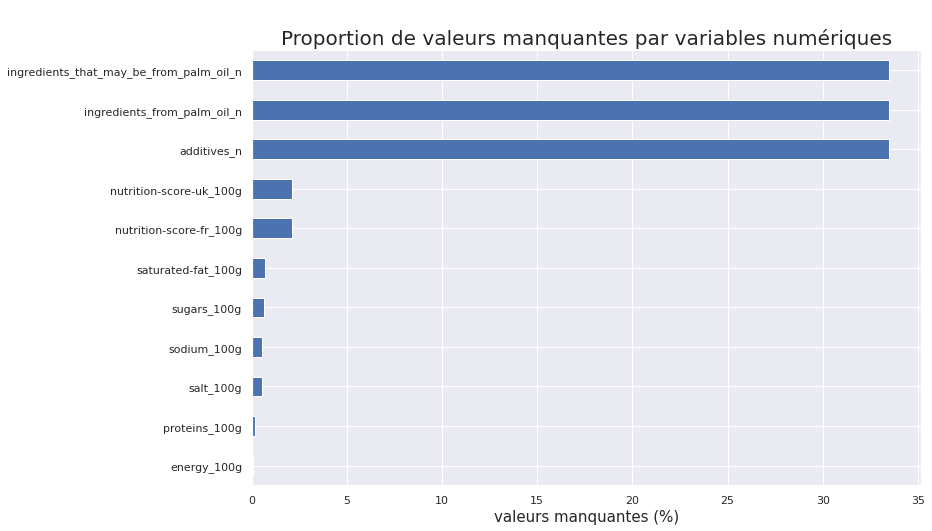

In [32]:
plt.figure(figsize=(12,8))
(data.iloc[:,(data.dtypes == 'float64').values].isna().mean()*100).sort_values().plot.barh()
plt.title("\nProportion de valeurs manquantes par variables numériques" , size=20)
plt.xlabel('valeurs manquantes (%)',size=15)
if save_figures : plt.savefig("a5.jpeg")
plt.show()

Effectif des <strong> variables numériques </strong>

In [33]:
(data.dtypes =='float64').sum()

11

In [34]:
float_var_name = data.iloc[:, (data.dtypes == 'float64').values].columns
float_var_name

Index(['additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'energy_100g',
       'saturated-fat_100g', 'sugars_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g'],
      dtype='object')

## Valeurs manquantes sur les variables de type `object`

In [35]:
data.iloc[:,(data.dtypes == 'object').values].isna().mean()*100

code                   0.000000
categories            27.637778
categories_tags       27.637778
categories_fr         27.637778
countries              0.000000
additives             33.509381
nutrition_grade_fr     2.132690
pnns_groups_1         23.186292
pnns_groups_2         23.030364
dtype: float64

Effectif des <strong> variables Object </strong>

In [36]:
(data.dtypes =='object').sum()

9

## Toutes les variables ayant été détectées comme type `object`

In [37]:
data.loc[:, data.dtypes =='object' ]

,code,categories,categories_tags,categories_fr,countries,additives,nutrition_grade_fr,pnns_groups_1,pnns_groups_2
190,0000010187319,NaN,NaN,NaN,France,NaN,d,NaN,NaN
191,0000010207260,NaN,NaN,NaN,France,NaN,d,NaN,NaN
226,0000040608754,Sodas au cola,"en:beverages,en:carbonated-drinks,en:sodas,en:...","Boissons,Boissons gazeuses,Sodas,Sodas au cola...",France,[ eau-gazeifiee -> fr:eau-gazeifiee ] [ eau...,e,Beverages,Sweetened beverages
234,0000069161025,NaN,NaN,NaN,France,NaN,d,NaN,NaN
240,0000087177756,"Sodas au citron,Boissons sucrées","en:plant-based-foods-and-beverages,en:beverage...","Aliments et boissons à base de végétaux,Boisso...",France,[ eau-gazeifiee -> fr:eau-gazeifiee ] [ eau...,e,Beverages,Sweetened beverages
...,...,...,...,...,...,...,...,...,...
320740,9782211109758,NaN,NaN,NaN,France,NaN,d,NaN,NaN
320741,9782401029101,NaN,NaN,NaN,France,NaN,b,NaN,NaN
320751,9847548283004,"Biscottes au sarrasin,Biscottes","en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",France,NaN,a,Cereals and potatoes,Bread
320757,9900000000233,NaN,NaN,NaN,France,NaN,b,NaN,NaN


## Doublons et Traitement

In [38]:
data[data.duplicated('code' , keep=False).values]

,code,categories,categories_tags,categories_fr,countries,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g


In [39]:
if data.duplicated('code' , keep=False).sum()  :
    data = data.drop( data[data.duplicated('code').values].index ,  axis=0)
    
data[data.duplicated('code' , keep=False)]

,code,categories,categories_tags,categories_fr,countries,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g


In [40]:
data

,code,categories,categories_tags,categories_fr,countries,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
190,0000010187319,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,d,NaN,NaN,1753.0,0.80,87.70,0.60,0.0100,0.003937,14.0,14.0
191,0000010207260,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,d,NaN,NaN,2406.0,2.90,50.30,9.50,0.0030,0.001181,14.0,14.0
226,0000040608754,Sodas au cola,"en:beverages,en:carbonated-drinks,en:sodas,en:...","Boissons,Boissons gazeuses,Sodas,Sodas au cola...",France,2.0,[ eau-gazeifiee -> fr:eau-gazeifiee ] [ eau...,0.0,0.0,e,Beverages,Sweetened beverages,177.0,0.00,10.40,0.00,0.0254,0.010000,13.0,2.0
234,0000069161025,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,d,NaN,NaN,1079.0,11.00,1.00,7.50,0.8000,0.314961,15.0,15.0
240,0000087177756,"Sodas au citron,Boissons sucrées","en:plant-based-foods-and-beverages,en:beverage...","Aliments et boissons à base de végétaux,Boisso...",France,3.0,[ eau-gazeifiee -> fr:eau-gazeifiee ] [ eau...,0.0,0.0,e,Beverages,Sweetened beverages,177.0,0.00,10.40,0.00,0.1000,0.039370,13.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320740,9782211109758,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,d,NaN,NaN,1084.0,12.00,10.50,8.70,0.2900,0.114173,16.0,16.0
320741,9782401029101,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,b,NaN,NaN,4.0,1.00,1.00,10.00,10.0000,3.937008,0.0,0.0
320751,9847548283004,"Biscottes au sarrasin,Biscottes","en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",France,NaN,NaN,NaN,NaN,a,Cereals and potatoes,Bread,1643.0,0.60,2.60,13.00,0.6800,0.267717,-4.0,-4.0
320757,9900000000233,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,b,NaN,NaN,2406.0,3.73,3.89,21.22,0.1000,0.039370,0.0,0.0


## Etude des boxplots

Une petite vue sur la distribution des données 

['additives_n'] >> Size : (39664,) - Mean : 2.05 - Med : 1.0 -  IQR : 3.0 


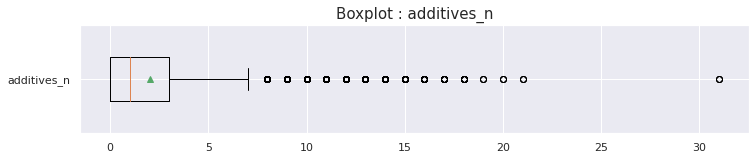

['ingredients_from_palm_oil_n'] >> Size : (39664,) - Mean : 0.08 - Med : 0.0 -  IQR : 0.0 


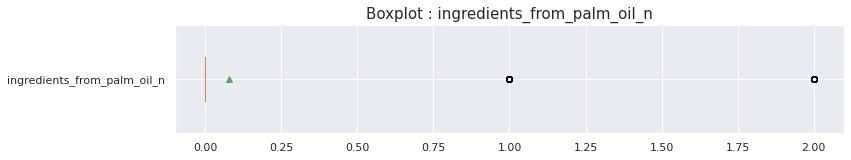

['ingredients_that_may_be_from_palm_oil_n'] >> Size : (39664,) - Mean : 0.17 - Med : 0.0 -  IQR : 0.0 


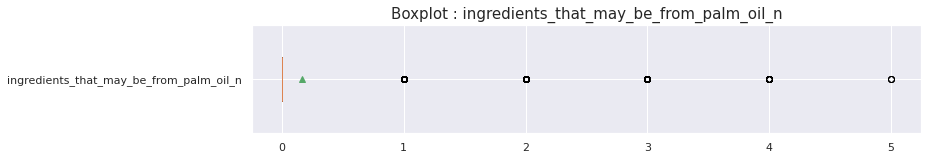

['energy_100g'] >> Size : (59613,) - Mean : 1173.15 - Med : 1029.0 -  IQR : 1216.0 


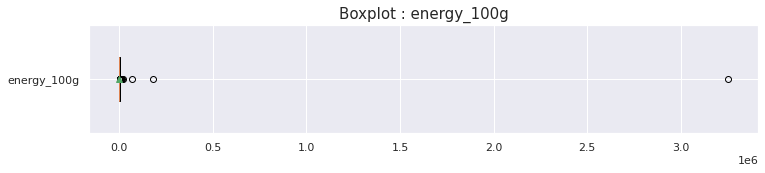

['saturated-fat_100g'] >> Size : (59226,) - Mean : 5.39 - Med : 1.9 -  IQR : 7.0 


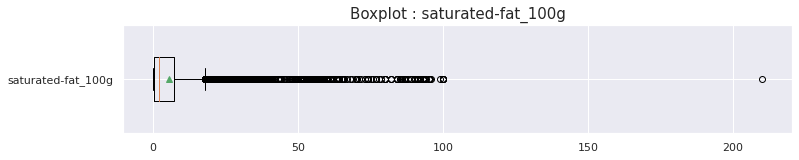

['sugars_100g'] >> Size : (59245,) - Mean : 13.18 - Med : 4.0 -  IQR : 16.0 


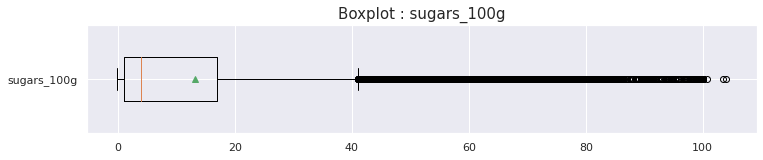

['proteins_100g'] >> Size : (59525,) - Mean : 7.78 - Med : 6.0 -  IQR : 9.2 


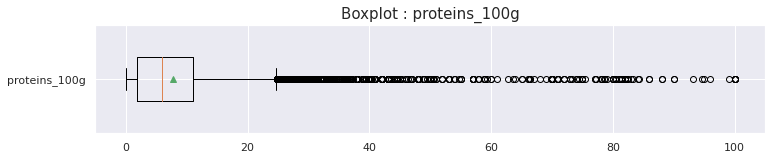

['salt_100g'] >> Size : (59309,) - Mean : 1.16 - Med : 0.57 -  IQR : 1.17 


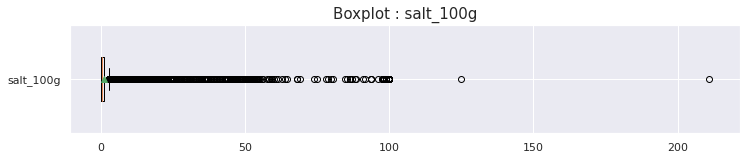

['sodium_100g'] >> Size : (59309,) - Mean : 0.46 - Med : 0.22 -  IQR : 0.46 


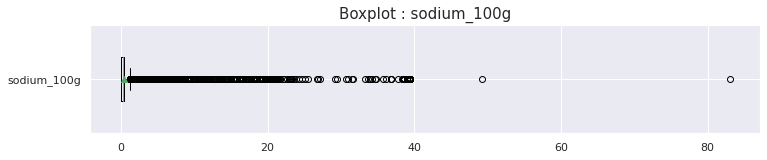

['nutrition-score-fr_100g'] >> Size : (58371,) - Mean : 8.61 - Med : 9.0 -  IQR : 14.0 


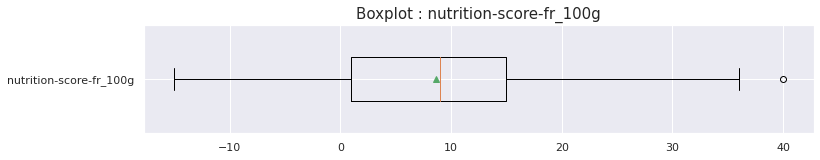

['nutrition-score-uk_100g'] >> Size : (58371,) - Mean : 8.3 - Med : 7.0 -  IQR : 16.0 


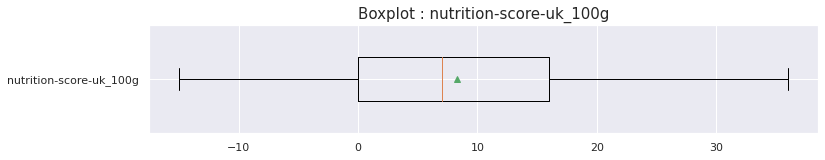

In [41]:
all_boxplots(data)

## Normalisation des valeurs de nutriments pour 100 g et traitement des Outliers

Toutes les valeurs plus petites que 100 g

In [42]:
exception = ['energy_100g','nutrition-score-fr_100g','nutrition-score-uk_100g','salt_100g','sodium_100g']
nutriments_name = [i for i in data.columns if (i not in exception)&(i[-5:]=='_100g')]

# Negatifs
for i in nutriments_name :
    mask = data[i]<=0
    data.loc[mask.values,i] = abs(data.loc[mask.values,i])

# > 100 g
for i in nutriments_name :
    mask = data[i] >= 95
    data.loc[mask.values,i] = data.loc[mask.values,i]%94

#  OUTLIERS
col = ['energy_100g','salt_100g','sodium_100g'] 
lim = [ 2.5e4,100,100]
for i,limite in zip(col,lim) :
    if i in data.columns :
        mask = data[i] > limite
        data.loc[mask.values,i] = random_replace( data[i], mask )
    
(data[nutriments_name] > 100).sum( ).sum()

0

Post visualisation des boxplot

['additives_n'] >> Size : (39664,) - Mean : 2.05 - Med : 1.0 -  IQR : 3.0 


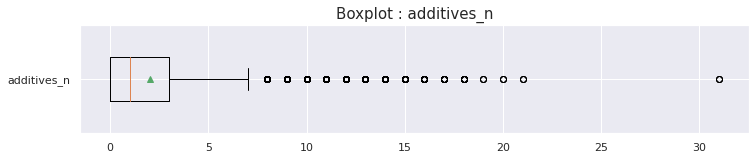

['ingredients_from_palm_oil_n'] >> Size : (39664,) - Mean : 0.08 - Med : 0.0 -  IQR : 0.0 


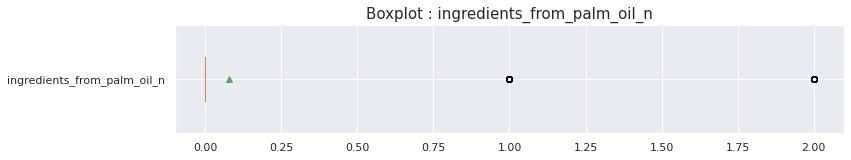

['ingredients_that_may_be_from_palm_oil_n'] >> Size : (39664,) - Mean : 0.17 - Med : 0.0 -  IQR : 0.0 


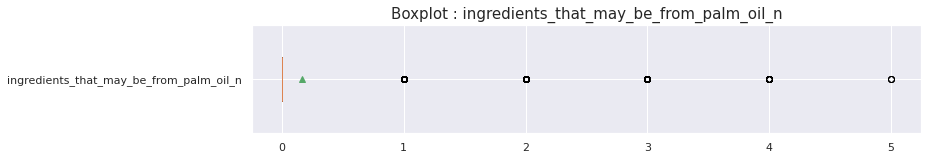

['energy_100g'] >> Size : (59613,) - Mean : 1114.43 - Med : 1029.0 -  IQR : 1216.0 


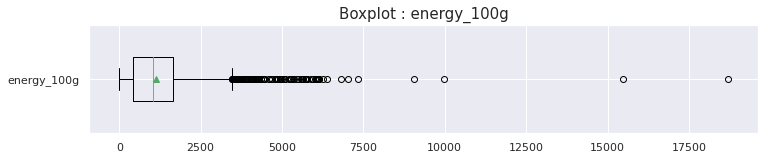

['saturated-fat_100g'] >> Size : (59226,) - Mean : 5.37 - Med : 1.9 -  IQR : 7.0 


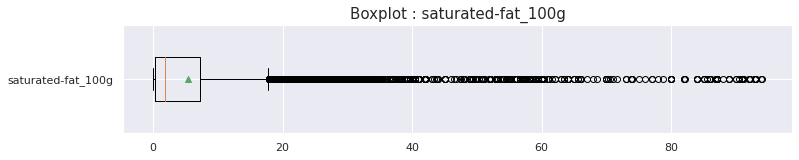

['sugars_100g'] >> Size : (59245,) - Mean : 12.85 - Med : 4.0 -  IQR : 15.4 


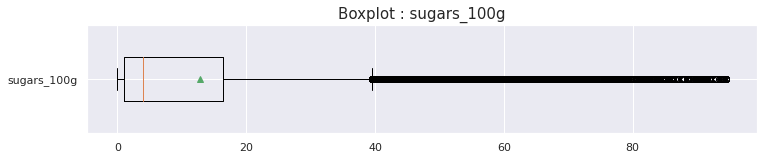

['proteins_100g'] >> Size : (59525,) - Mean : 7.77 - Med : 6.0 -  IQR : 9.2 


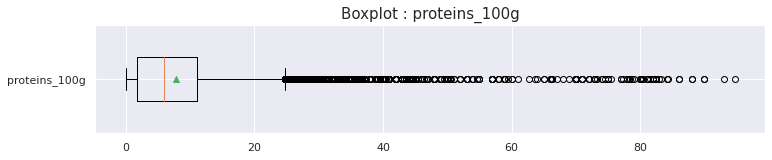

['salt_100g'] >> Size : (59309,) - Mean : 1.15 - Med : 0.57 -  IQR : 1.17 


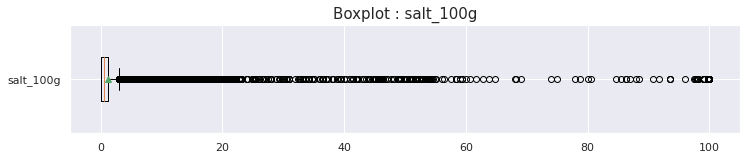

['sodium_100g'] >> Size : (59309,) - Mean : 0.46 - Med : 0.22 -  IQR : 0.46 


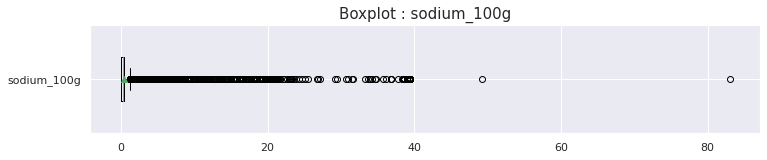

['nutrition-score-fr_100g'] >> Size : (58371,) - Mean : 8.61 - Med : 9.0 -  IQR : 14.0 


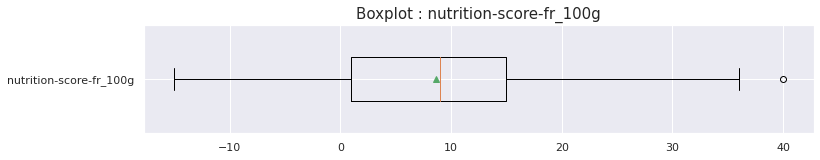

['nutrition-score-uk_100g'] >> Size : (58371,) - Mean : 8.3 - Med : 7.0 -  IQR : 16.0 


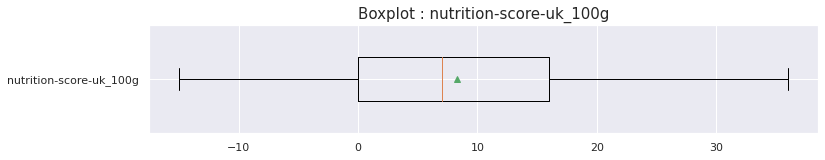

In [43]:
all_boxplots(data)

## Concentration des données et  valeurs manquantes

In [44]:
data[nutriments_name].isna().mean()

saturated-fat_100g    0.006992
sugars_100g           0.006673
proteins_100g         0.001978
dtype: float64

In [45]:
concentre = concentration(data, mode ='brice')
concentre

{'energy_100g': 0.14296,
 'saturated-fat_100g': 0.30165,
 'sugars_100g': 0.65257,
 'proteins_100g': 0.27908,
 'salt_100g': 0.13887,
 'sodium_100g': 0.06778,
 'nutrition-score-fr_100g': 0.55495,
 'nutrition-score-uk_100g': 0.62172}

## Remplacement des valeurs manquantes par des valeurs aléatoires prises entre la moyenne et la mediane : suivant un certain critère de concentration

In [46]:
for i in concentre.keys() : 
    if 'salt_100g' in concentre.keys() :
        if concentre[i] <= concentre['salt_100g'] :
            print(i)
            mask = data[i].isna()
            data[i][mask.values] = random_replace(data[i] , mask) 

salt_100g
sodium_100g


In [47]:
concentration(data, mode ='brice')

{'energy_100g': 0.14296,
 'saturated-fat_100g': 0.30165,
 'sugars_100g': 0.65257,
 'proteins_100g': 0.27908,
 'salt_100g': 0.13849,
 'sodium_100g': 0.0676,
 'nutrition-score-fr_100g': 0.55495,
 'nutrition-score-uk_100g': 0.62172}

['additives_n'] >> Size : (39664,) - Mean : 2.05 - Med : 1.0 -  IQR : 3.0 


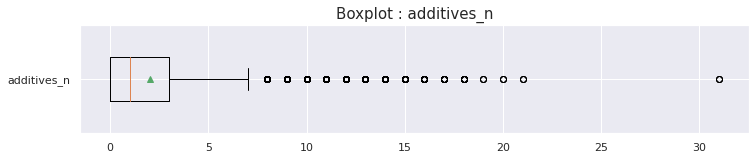

['ingredients_from_palm_oil_n'] >> Size : (39664,) - Mean : 0.08 - Med : 0.0 -  IQR : 0.0 


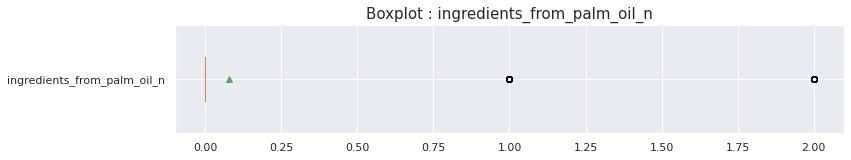

['ingredients_that_may_be_from_palm_oil_n'] >> Size : (39664,) - Mean : 0.17 - Med : 0.0 -  IQR : 0.0 


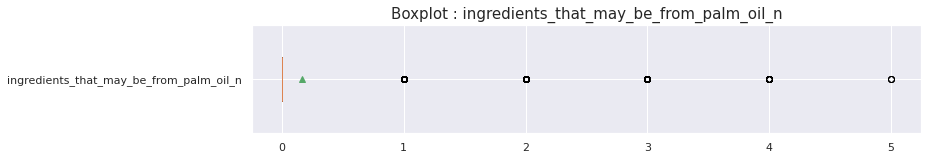

['energy_100g'] >> Size : (59613,) - Mean : 1114.43 - Med : 1029.0 -  IQR : 1216.0 


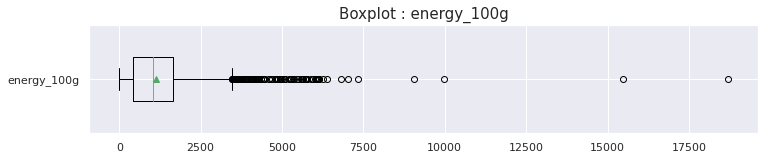

['saturated-fat_100g'] >> Size : (59226,) - Mean : 5.37 - Med : 1.9 -  IQR : 7.0 


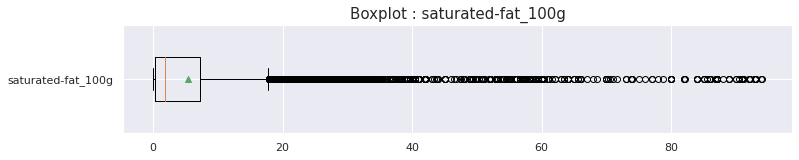

['sugars_100g'] >> Size : (59245,) - Mean : 12.85 - Med : 4.0 -  IQR : 15.4 


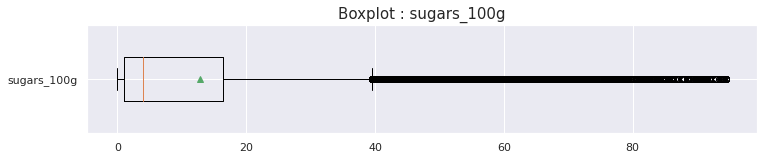

['proteins_100g'] >> Size : (59525,) - Mean : 7.77 - Med : 6.0 -  IQR : 9.2 


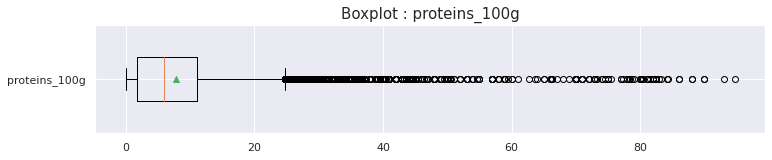

['salt_100g'] >> Size : (59643,) - Mean : 1.15 - Med : 0.58 -  IQR : 1.17 


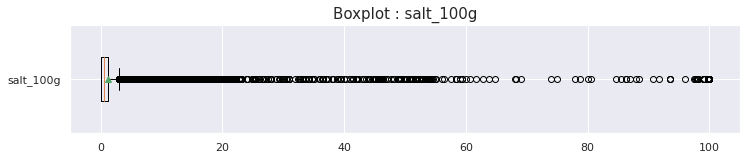

['sodium_100g'] >> Size : (59643,) - Mean : 0.46 - Med : 0.23 -  IQR : 0.46 


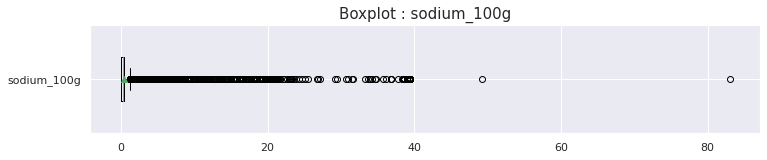

['nutrition-score-fr_100g'] >> Size : (58371,) - Mean : 8.61 - Med : 9.0 -  IQR : 14.0 


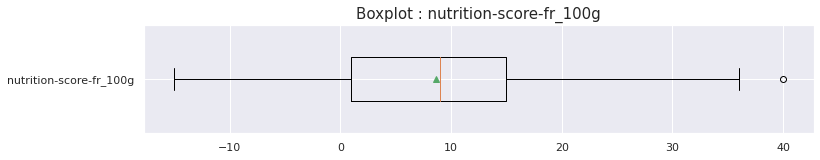

['nutrition-score-uk_100g'] >> Size : (58371,) - Mean : 8.3 - Med : 7.0 -  IQR : 16.0 


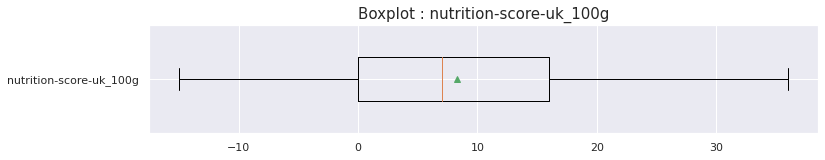

In [48]:
all_boxplots(data)

## Distribution des valeurs manquantes

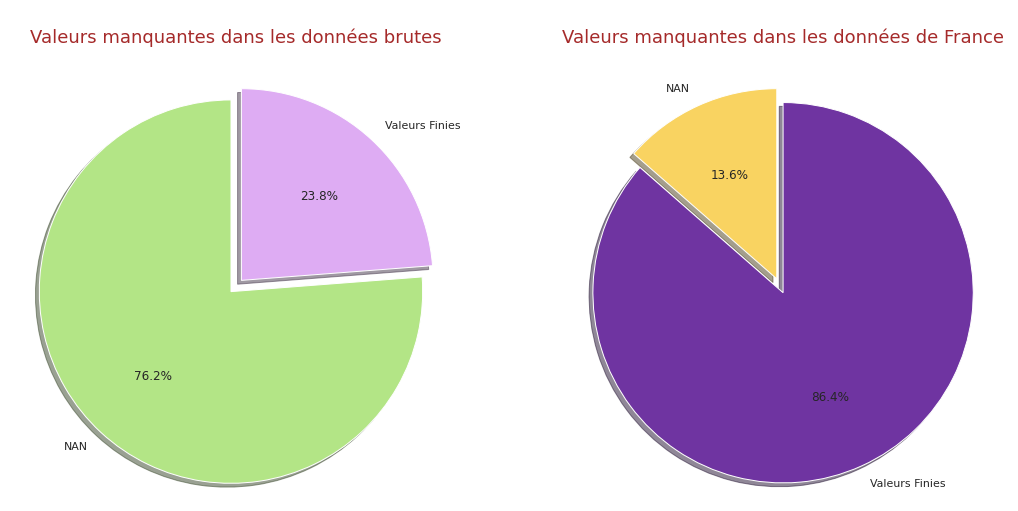

In [49]:
a , a_0 =  data.isna().sum().sum()  ,  data_0.isna().sum().sum()
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
camemberg(sizes = [ a_0 , data_0.size - a_0 ] , labels = ["NAN","Valeurs Finies"] ,titre = "\nValeurs manquantes dans les données brutes\n")
plt.subplot(1,2,2)
camemberg(sizes = [ a , data.size - a ] , labels = ["NAN","Valeurs Finies"] , titre = f"\nValeurs manquantes dans les données de {data['countries'].unique()[0]}\n" )
if save_figures : plt.savefig("a6.jpeg")
plt.show()

In [50]:
data.shape

(59643, 20)

## Correlation entre les variables

In [51]:
data.select_dtypes(include=[float]).columns

Index(['additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'energy_100g',
       'saturated-fat_100g', 'sugars_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g'],
      dtype='object')

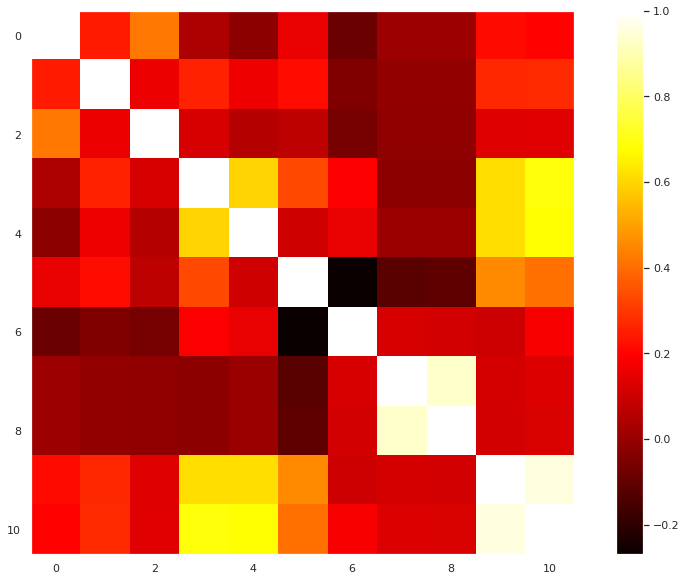

In [52]:
x = np.array( data[float_var_name].dropna(axis=0) )
plt.figure(figsize=(15,10))
plt.imshow( np.corrcoef(x.T) , cmap='hot')
plt.colorbar()
plt.grid(visible=False)
if save_figures : plt.savefig("a7.jpeg")
plt.show()

In [53]:
for i in range(len(float_var_name)) : print( f"{i} - {float_var_name[i]}" )

0 - additives_n
1 - ingredients_from_palm_oil_n
2 - ingredients_that_may_be_from_palm_oil_n
3 - energy_100g
4 - saturated-fat_100g
5 - sugars_100g
6 - proteins_100g
7 - salt_100g
8 - sodium_100g
9 - nutrition-score-fr_100g
10 - nutrition-score-uk_100g


##  Analyse par composantes principales  ( ACP  )

 choix du nombre de composantes à calculer

In [54]:
n_comp = min( data.index.size , float_var_name.size  )  
plan_principaux = [(0,1),(2,3)]

selection des colonnes à prendre en compte dans l'ACP

In [55]:
data_pca = data[ float_var_name]

préparation des données pour l'ACP

In [56]:
data_pca = data_pca.fillna( 0.5*(data_pca.mean() + data_pca.median() )) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
names = data["code"] # ou data.index
features = float_var_name

Centrage et Réduction des données sur chaque variable

In [57]:
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled  = std_scale.transform(X)
X_scaled.shape

(59643, 11)

 Calcul des composantes principales

In [58]:
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=11)

Eboulis des valeurs propres

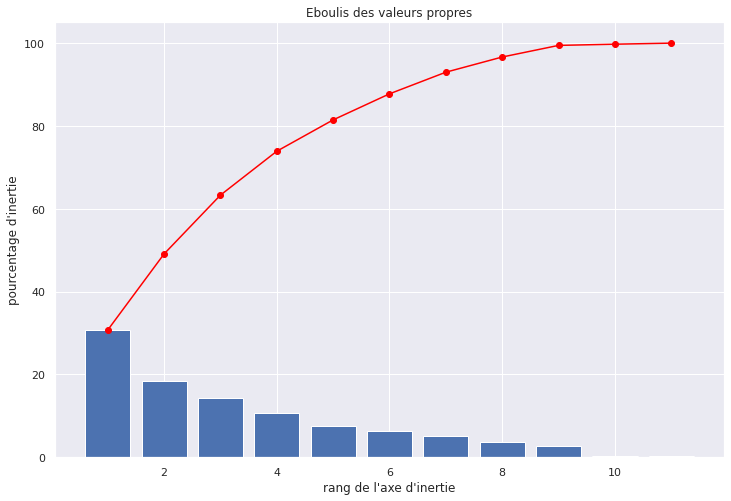

In [59]:
display_scree_plot(pca)

Cercle des corrélations

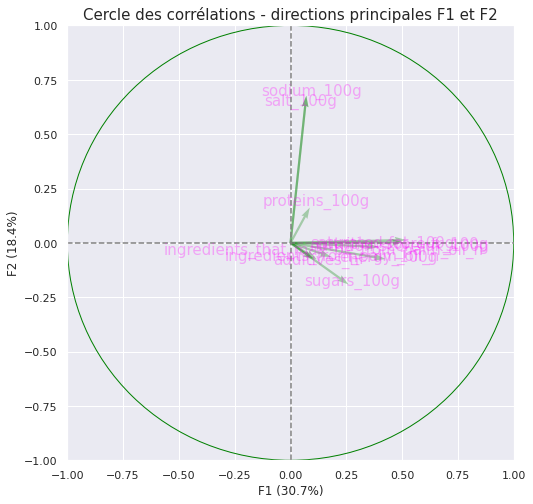

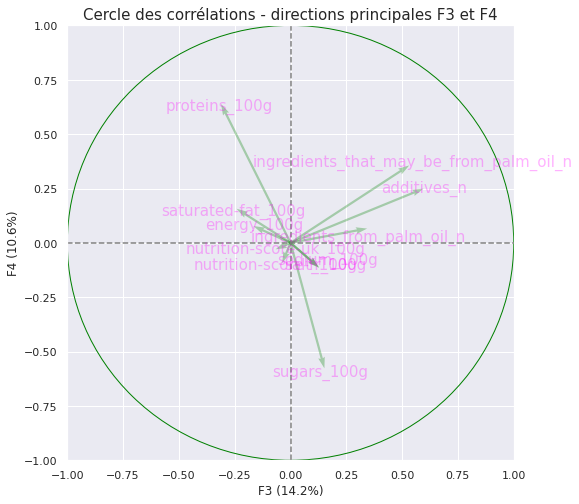

In [60]:
pcs = pca.components_
display_circles(pcs, n_comp, pca, plan_principaux, labels = np.array(features) , fgsize=(8,8),label_num=False,labl_arrow_size = 15)

- Projection du nuage des individus sur les plans factoriels

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ['0000010187319' '0000010207260' '0000040608754' ... '9847548283004'
 '9900000000233' '99111250']

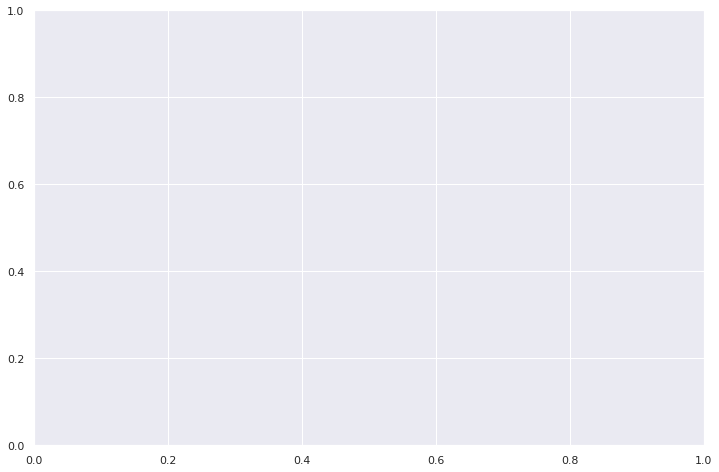

In [61]:
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, plan_principaux , labels = np.array(names), show_label_element = False)

plt.show()

# Methode ANOVA

Sur l'étude de la relation entre le `nombre d'additifs` et le `nutrigrade` des différents produits

preparation des données

In [ ]:
anova_data_fr = data[ ["nutrition_grade_fr","additives_n"] ]
anova_data = data_0[ ["nutrition_grade_fr","additives_n"] ]
anova_data =  anova_data.dropna( axis=0 )
anova_data_fr =  anova_data_fr.dropna( axis=0 )

Test de Fisher

In [ ]:
anova_test = smf.ols('additives_n~nutrition_grade_fr', data=anova_data).fit()
sm.stats.anova_lm(anova_test, typ=2)

D'après p-valeur de ce test il devrait avoir un lien étroit entre le nutriscore et le nombre d'additifs.

Mais en regardant les graphes ci dessous on comprends mieux l'origine de ce lien.

In [ ]:
y = anova_data.groupby("nutrition_grade_fr", sort =True) 
x = y.mean().index
plt.figure(figsize=(15,8))
plt.plot( x , y.mean().values.ravel() , label ="Moyenne" ,lw=5,ls='dashed')
plt.plot( x , y.median().values.ravel() , label ="mediane" ,lw=5,ls='dotted')
plt.plot( x , y.quantile(q=0.25).values.ravel() , label ="Q1" ,lw=5,ls='dashdot')
plt.plot( x , y.quantile(q=0.75).values.ravel() , label ="Q3" ,lw=5,ls="-.")
plt.plot( x , y.std().values.ravel() , label ="std" ,lw=5)
plt.xlabel('\nnutrigrade',size=15)
plt.ylabel('Indicateurs',size=15)
plt.title('\nIndicateur statistique en fonction du nutrigrade\n', size=20)
plt.legend(loc='best')
if save_figures : plt.savefig("a8.jpeg")
plt.show()

## Histogramme du nombre d'additifs

In [ ]:
plt.figure(figsize=(12,8))
data["additives_n"].value_counts().sort_index().plot.barh()
plt.ylabel("ADDITIFS" , size=15)
plt.xlabel("Effectifs",size=15)
if save_figures : plt.savefig("b.jpeg")
plt.show()

In [ ]:
sns.set(rc={"figure.figsize":(14,8)})
ax = sns.boxplot(x="nutrition_grade_fr", y="additives_n", data=anova_data, color='orange',orient='v',order=["a","b","c","d","e"])
plt.xlabel('Nutriscore',size=15)
plt.ylabel("nombre d'addictifs",size=15)
plt.title('Boîtes à moustaches',size=20)
if save_figures : plt.savefig("b1.jpeg")
plt.show()

Les boxplots nous permettent d'observer que le nombre d'additifs n'est pas vraiment pris ene compte dans l'évaluation du nutriscore puisque chaque groupe de nutriscore comprends des produits avec diverses valeurs d'incateurs.

Il n'existe par exemple pas de nutriscore ne comprenant que des produits avec aucun additifs. Le nutriscore ne donne donc aucune information préciser sur la contenance du produit en additifs.


Le <strong> nouvel indicateur </strong> que je vais construire regroupes des produits en différents groupe selon le contenance en indicateurs

# Construction et ananlyse descriptive du nouveau score nommé  `Score_nutriaddi`

acquisition du `score_nutriaddi` partir du DataFrame `data`

In [ ]:
data = score_nutriaddi(data)

## Sauvegarde de données

In [ ]:
data.to_csv("datav1.csv")

In [ ]:
data["score_nutriaddi"].value_counts().sort_index().plot.barh(color='green')
if save_figures : plt.savefig("a9.jpeg")
plt.show()

In [ ]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
data["score_nutriaddi"].value_counts(normalize=True).plot.barh(width=0.5 )
plt.title("\nRepartition par grade nutriaddi",size=20)
plt.ylabel("\nScore nutriaddi",size=17)
plt.xlabel("Frequence",size=17)
plt.subplot(1,2,2)
plt.title("Repartition par grade nutitionel",size=20)
data["nutrition_grade_fr"].value_counts(normalize=True).plot.barh(width=0.3 )
plt.ylabel("\nnutri-grade",size=17)
plt.xlabel("Frequence",size=17)
if save_figures : plt.savefig("a10.jpeg")
plt.show()

Test de Fisher sur le nouveau score construit et le nombre d'additifs

In [ ]:
anova_test = smf.ols('additives_n~score_nutriaddi', data=data).fit()
sm.stats.anova_lm(anova_test, typ=2)

In [ ]:
sns.set(rc={"figure.figsize":(14,8)})
ax = sns.boxplot(x="score_nutriaddi", y="additives_n", data=data, color='orange',orient='v')
plt.xlabel('score_nutriaddi')
plt.ylabel("nombre d'addictifs")
plt.title('Boîtes à moustaches',size=20)
plt.show()

In [ ]:
data.groupby("nutrition_grade_fr").mean()[['nutrition-score-fr_100g','nutrition-score-uk_100g']].plot.barh(figsize=(12,4))
data.groupby("score_nutriaddi").mean()[['nutrition-score-fr_100g','nutrition-score-uk_100g']].plot.barh(figsize=(12,12))
if save_figures : plt.savefig("a11.jpeg")
plt.show()

In [ ]:
float_var_name

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(data.groupby ( [ "nutrition_grade_fr" ] ).mean().corr().values.ravel(), bins=50 ,label='nutrigrade',alpha=0.7)
plt.hist(data.groupby ( [ "score_nutriaddi" ] ).mean().corr().values.ravel(), bins=50 ,label='score_nutriaddi',alpha=0.7)
plt.xlabel("\nCorrelation",size=15)
plt.ylabel("Quantité",size=15)
plt.title("\nDistribution des corellations entre variables pour chaque Score\n",size=20)
plt.legend()
if save_figures : plt.savefig("a12.jpeg")
plt.show()

# Diagramme pyramidal

### histogramme des correlations selon chaque score

In [ ]:
u = pd.DataFrame({ "nutrigrade" : data.groupby(["nutrition_grade_fr"]).mean().corr().values.ravel(),
                   "score nutriaddi" : data.groupby(["score_nutriaddi"]).mean().corr().values.ravel()            })
v = data_segmentation(u,'Correlation',"nutrigrade",'score nutriaddi',15)

pyramide_graphique(v,'Correlation',"nutrigrade",'score nutriaddi', save =True)

In [ ]:
plt.figure(figsize=(24,12))
plt.subplot(1,2,1)
plt.grid(visible=False)
plt.imshow(data.groupby ( [ "nutrition_grade_fr" ] ).mean().corr(), cmap='hot' )
plt.title('Nutrigrade\n' , size=20)
plt.colorbar()
plt.subplot(1,2,2)
plt.grid(visible=False)
plt.title('Score nutriaddi\n' , size=20)
plt.imshow(data.groupby ( [ "score_nutriaddi" ] ).mean().corr(), cmap='hot'  )
plt.colorbar()
if save_figures : plt.savefig("a13.jpeg")
plt.show()

## Contraste de correlation

In [ ]:
plt.figure(figsize=(10,10))
plt.grid(visible=False)
a = abs(data.groupby ( [ "nutrition_grade_fr" ] ).mean().corr() )
b = abs(data.groupby ( [ "score_nutriaddi" ] ).mean().corr() )
plt.imshow( abs(a-b)/(a+b) , cmap='hot_r' )
plt.title('Contraste\n' , size=20)
plt.colorbar()
if save_figures : plt.savefig("a14.jpeg")
plt.show()

### Association de chaque indice à un nutriment

In [ ]:
col = data.select_dtypes(include=float).columns
[f"{i} - {col[i]}" for i in range(col.size)]

### histogramme Pyramidal :  Sel Vs Sucre

In [ ]:
obs , pop_a , pop_b = "Masse ( 100 g )", "sugars_100g", "salt_100g"
pyramide_graphique(data , obs, pop_a , pop_b, segmenter=True, nbr_intervals= 8)

## Moyenne de quelques nutriments pour chaque score nutriaddi

In [ ]:
data.groupby("score_nutriaddi").mean()[["sugars_100g","proteins_100g","salt_100g","additives_n","saturated-fat_100g"]].plot.area(subplots=False,figsize=(15,10),legend=True, stacked=False)
plt.ylabel("Quantité moyenne",size=15)
plt.xlabel("grade nutriaddi", size=15)
plt.title("Moyenne de quelques nutriments par groupe de grade nutriaddi\n" ,size=20)
if save_figures : plt.savefig("a15.jpeg")
plt.show()